<a name="top"></a>
># Estudio para poder determinar en que comunidad autonoma es mejor lugar para trabajar y como tomar esa decicion



<a id="indice"></a> <br>
## Índice

1. [Introducción](#1)
2. [Hipotesis](#2)
3. [Preparacion de los dataset con sus diferentes modos de obtencion de datos](#3)
4. [Estudio de nuestra hipotesis y de los datos obtenidos](#4)  
    4.1. [Conclusion mejor ciudad para teletrabajar](#41)
5. [Hipotesis personal entre Madrid y Burgos](#5)  
    5.1. [Resultado hipotesis](#51)
6. [Conclusiones finales del proyecto](#6)  


<a id="1"></a> <br>
## 1. Introducción :

Voy a hacer un pequeño resumen de los sitios en los que he obtenido los datos y csv para realizar el estudio.
1. En la base de datos del INE he obtenido muchos de los csv usados aqui, como por ejemplo :
    - [Cantidad de empresas por municipio y actividad ](src/Data/empresas_municipio_actividad.csv)
    - [Indice de precios al consumo por comunidades ](src/Data/indice_precios_cansumo_comunidades.csv)
    - [Indice de precios de vivienda por comunidad ](src/Data/indice_precios_vivienda_comunidad.csv)
    - [Poblacion activa por comunidades ](src/Data/poblacion_activa_por_comunidades.csv)
    - [Esperanza de vida por nacimiento en comunidad ](src/Data/esperanza_vida_por_nacimiento_comunidad.csv)
    - [Tasa de riesgo de pobreza por comunidad ](src/Data/tasa_riesgo_de_pobreza_comunidad.csv)
    - [Incidencia del teletrabajo ](src/Data/incidencia_teletrabajo_comunidad.csv)
    - [Esperanza de vida por comunidad ](src/Data/esperanza_de_vida_por_comunidades.csv)
    - [Renta por hogar por comunidades](src/Data/renta_por_hogar_comunidad.csv)
    - [Acceso a internet por comunidades](src/Data/acceso_internet.csv)
2. En la base de datos de la web "Datos.gob.es" :
    - [Poblacion por comunidades](src/Data/poblacion_comunidades.csv)
    - [Turismos de servicio publico](src/Data/turismos_de_servicio_publico.csv)
3. En la pagina web de la AEMET a traves de su API :
    - [El tiempo en Burgos](src/Data/tiempo_burgos.csv)
    - [El tiempo en Madrid](src/Data/tiempo_madrid.csv)
4. En la web del ministerio de transportes trabajando a mano un pdf 
    - [PDF con la cantidad de licencias de taxis y vtc](https://cdn.mitma.gob.es/portal-web-drupal/estadistica_tt/webturi.pdf)
5. En la web de los ayuntamientos de Burgos y Madrid : 
    - [Teatros en Madrid](src/Data/teatro_mad.csv)
    - [Teatros en Burgos](src/Data/red_teatros.csv)



<a id="2"></a> <br>
## 2. Hipotesis  

- Calcular cual es la comunidad autonoma para teletrabajar

- Decidir personalmente entre Madrid y Burgos

<a id="3"></a> <br>
## 3. Preparacion de los dataset con sus diferentes modos de obtencion de datos 

Para obtener los dataset, hemos usado en este caso tres metodos diferentes. 
 - Descarga de archivos csv de paginas web con bases de datos propias. 
 - Uso de una API para la obtencion de los datos de dos comunidades autonomas diferentes. Se puede ver el proceso en : [notebook](src/notebooks/limpieza_y_graficos.ipynb)
 - Datos recopilados de internet mediante un pdf pasado a un diccionario. Se puede ver el proceso en : [notebook](src/notebooks/diccionarioPDF.ipynb)

Para realizar este proceso, he tenido que hacer mucha limpieza de datos y columnas, ya que algunos de los dataframes eran de gran tamaño y solo necesitabamos unos valores concretos. he descartado los valores innecasarios y he ido recopilando hasta dejar las tablas solo con las columnas necesarias para hacer las comparaciones. Este proceso lo podemos observar en estos notebooks :
- [notebook1](src/notebooks/limpieza_y_graficos.ipynb)
- [notebook2](src/notebooks/limpieza_y_graficos2.ipynb)
- [notebook3](src/notebooks/limpieza_y_graficos3.ipynb)
- [notebook4](src/notebooks/teatro.ipynb)

<a id="4"></a> <br>
## 4. Estudio de nuestra hipotesis y de los datos obtenidos


Una vez obtenido todos los datos limpios para nuestro estudio, era hora de poder estudiarlos a fondo.

La idea principal de este estudio era que para sacar conclusiones de los datos obtenidos tendriamos que valorar sus resultados y en algunos casos compararlos con variables como la poblacion total de cada comunidad, para saber realmente la comparativa entre la cantidad de infraestructuras que tiene una ciudad y a cuantas personas les llegaria en total.

Poniendo un ejemplo de ello voy a mostrarles el proceso por el cual comparamos los hospitales de una comunidad autonoma en funcion de cuantas camas hay para cada 100.000 habitantes, para saber realmente la proporcion de cada valor. De nada nos serviria saber cuantos hospitales tiene cada comunidad si no lo comparamos con su densidad de poblacion.

Aqui vemos el ejemplo :

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("src/Data/hospitales.csv")
df

,Comunidades y Ciudades Autónomas,Hospitales,PHD por 100.000 habitantes
0,Cataluña,155,69.4
1,País Vasco,26,58.7
2,Cantabria,5,50.4
3,"Asturias, Principado",12,45.5
4,"Navarra, C. Foral de",6,42.8
5,Castilla y León,17,39.2
6,Andalucía,51,38.9
7,"Madrid, Comunidad de",38,38.1
8,Galicia,19,34.0
9,Aragón,21,33.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Comunidades y Ciudades Autónomas  19 non-null     object 
 1   Hospitales                        19 non-null     int64  
 2   PHD por 100.000 habitantes        19 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 588.0+ bytes


Esto seria el dataframe obtenido, despues de la limpieza de columnas, datos y la ordenacion de la tabla en funcion del valor de las camas por habitante. Como podemos observar , si nos ciñeramos al dato de los hospitales por comunidad sin tener en cuenta la cantidad de poblacion de cada comunidad autonoma, saldria otro resultado en la tabla.
Generando un grafico por cada valor , nos damos cuenta que no somos capaces de valorar realmente los datos de cada valor. por ejemplo haciendo esta grafica :

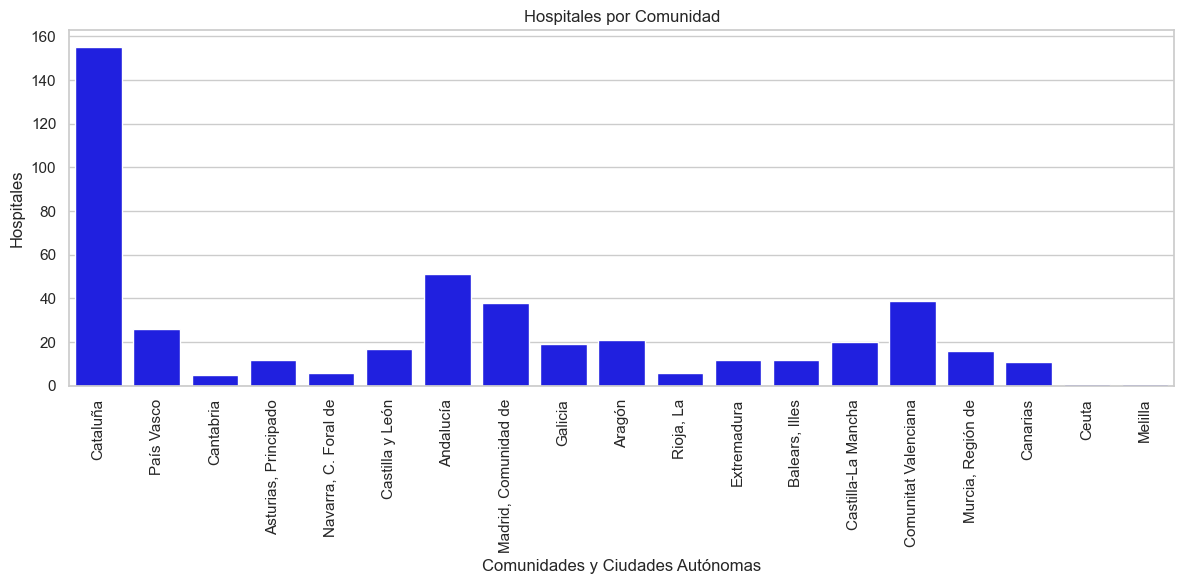

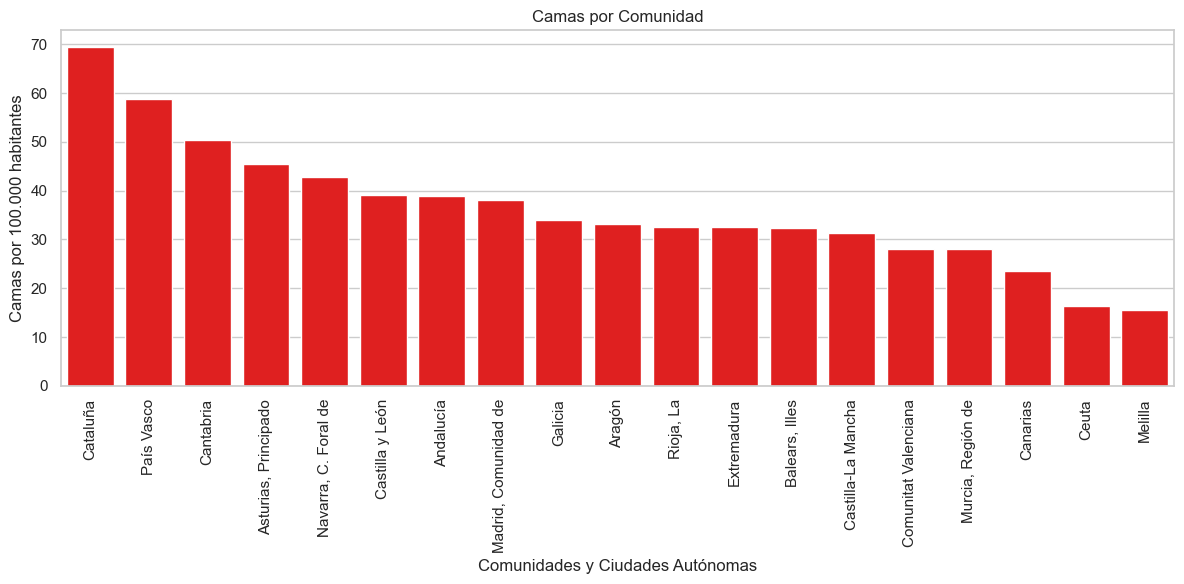

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x='Comunidades y Ciudades Autónomas', y='Hospitales', color='blue')
plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Hospitales')
plt.title('Hospitales por Comunidad')
plt.xticks(rotation=90)  
plt.tight_layout() 
#plt.savefig('../img/hospitales.jpg', bbox_inches='tight') 
plt.show()


plt.figure(figsize=(12, 6))  
sns.barplot(data=df, x='Comunidades y Ciudades Autónomas', y='PHD por 100.000 habitantes', color='red')
plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Camas por 100.000 habitantes')
plt.title('Camas por Comunidad')
plt.xticks(rotation=90)  
plt.tight_layout() 
#plt.savefig('../img/camas.jpg', bbox_inches='tight') 
plt.show()

Para poder ver realmente la comparativa de ambos valores decidi hacer otra grafica en la que me comparara bien los valores, y fue algo sorprendente ver la diferencia que hay en el punto alto de Cataluña respecto a las demas comunidades, y que en Andalucía y la comunidad valenciana haya menos camas que hospitales.

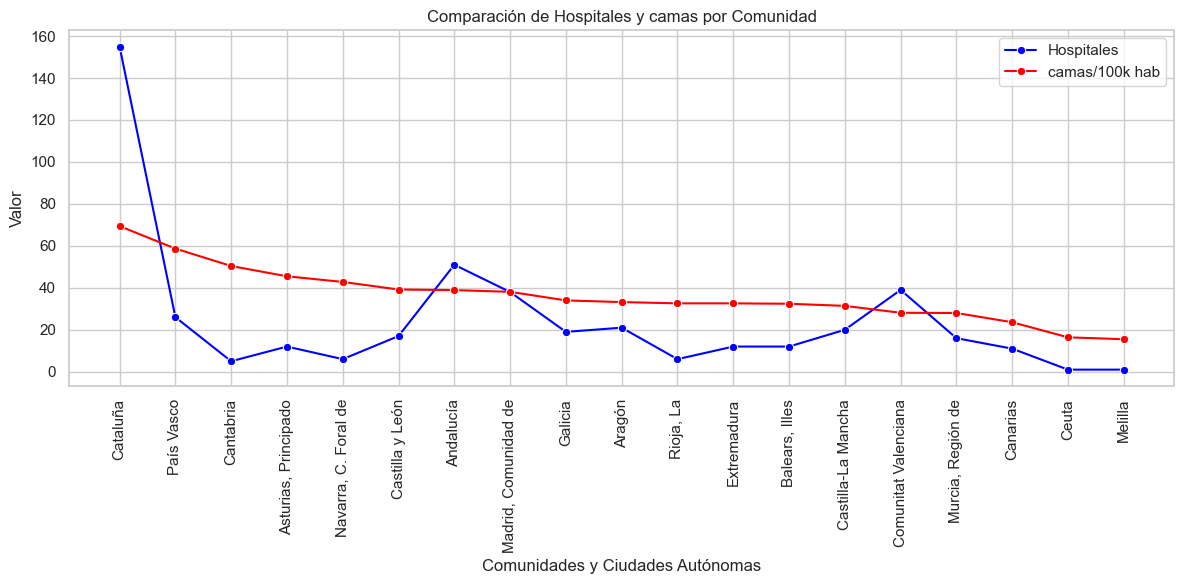

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  

sns.lineplot(data=df, x='Comunidades y Ciudades Autónomas', y='Hospitales', marker='o', label='Hospitales', color='blue')
sns.lineplot(data=df, x='Comunidades y Ciudades Autónomas', y='PHD por 100.000 habitantes', marker='o', label='camas/100k hab', color='red')

plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Valor')
plt.title('Comparación de Hospitales y camas por Comunidad')
plt.xticks(rotation=90)  
plt.legend()  
plt.tight_layout()  
#plt.savefig('../img/cama_hospi_lineal.jpg', bbox_inches='tight')
plt.show()

Una vez obtenidos los datos que os he enseñado, mi idea principal ha sido que para darle valor a cada una de las listas, lo mejor seria ordenarlas en funcion de su valor, y usar el indice que quedaria para pasarlo a una columna llamada puntuacion. Ese mismo indice valoraria del 1 al 19 segun su posicion en la tabla ordenada. Este seria el codigo que he usado para ello :

In [15]:
df = df.iloc[::-1].reset_index(drop=True)
df.index = range(1, 20)
df['indice_hospitales'] = df.index
df.index = range(1, 20)


In [16]:
df

,Comunidades y Ciudades Autónomas,Hospitales,PHD por 100.000 habitantes,indice_hospitales
1,Melilla,1,15.5,1
2,Ceuta,1,16.4,2
3,Canarias,11,23.6,3
4,"Murcia, Región de",16,28.0,4
5,Comunitat Valenciana,39,28.1,5
6,Castilla-La Mancha,20,31.4,6
7,"Balears, Illes",12,32.4,7
8,Extremadura,12,32.6,8
9,"Rioja, La",6,32.6,9
10,Aragón,21,33.2,10


In [17]:

df.rename(columns={'indice_hospitales' : 'Puntuacion hospitales'}, inplace=True)
df_indice = df.drop(columns=['Hospitales', 'PHD por 100.000 habitantes'])

In [18]:
df_indice

,Comunidades y Ciudades Autónomas,Puntuacion hospitales
1,Melilla,1
2,Ceuta,2
3,Canarias,3
4,"Murcia, Región de",4
5,Comunitat Valenciana,5
6,Castilla-La Mancha,6
7,"Balears, Illes",7
8,Extremadura,8
9,"Rioja, La",9
10,Aragón,10


De esta manera, tendriamos una columna que puntuaria del 1 al 19 segun los datos obtenidos en el dataframe. En este caso Melilla seria el que menor puntuacion tiene, ya que solo tiene 15.5 habitaciones por cada 100.000 habitantes, mientras que Cataluña obtendria 19 puntos por ser la comunidad que mayor numero de camas tiene por cada 100.000 habitantes. Este proceso lo he ido llevando a cabo para todos los dataframes que tenia. Para resumir podreis ver el proceso en los siguientes notebooks :

- [notebook1](src/notebooks/obtencion_indices.ipynb)
- [notebook2](src/notebooks/obtencion_indices2.ipynb)


Por último, he realizado un merge para unir todas las tablas con sus valores y puntuaciones en una sola. Al obtener el dataframe con todas las columnas ordenadas previamente por cada comunidad autonoma hemos obtenido una seria de columnas numericas con las que podemos trabajar las operaciones necesarias. 
En este caso una vez unidos todos los dataframes, lo que he hecho ha sido un sumatorio de todas las columnas menos la primera, ya que esta seria el nombre de la comunidad y no nos permitiría realizar esa suma.
Para ello he usado la siguiente sentencia  : 


In [ ]:
# con esto creamos la columna Total , sumando todos los valores por fila, menos el primero, que es el nombre de las comunidades
merge_total['Total'] = merge_total.iloc[:, 1:].sum(axis=1)

In [ ]:
# Volvemos a organizar la tabla en funcion del valor de la columna Total
merge_total = merge_total.sort_values(by='Total', ascending=False)

Dejandonos la tabla con el siguiente resultado final :

In [19]:
total = pd.read_csv("src/Data/tabla_puntuacion_total.csv")

In [20]:
total

,Comunidades y Ciudades Autónomas,Puntos Bares,Puntos Vida,Puntos hospitales,Puntos viviendas sin internet,Puntos IPC alimentos,Puntos poblacion activa,Puntos precio vivienda,Puntos renta media,Puntos riesgo pobreza,Puntos Taxis,Puntos teletra,Total
0,"Madrid, Comunidad de",4,19,12,13,10,19,7,19,16,19,19,157
1,País Vasco,10,16,18,18,9,13,12,17,18,9,15,155
2,Cataluña,8,12,19,9,14,16,9,14,17,17,18,153
3,Aragón,7,11,10,11,16,17,5,13,14,16,16,136
4,Castilla y León,14,17,14,6,15,12,10,9,11,11,9,128
5,"Navarra, Comunidad Foral de",3,18,15,7,12,15,3,18,19,6,11,127
6,"Rioja, La",11,10,9,5,6,18,15,10,13,5,13,115
7,Comunitat Valenciana,15,6,5,10,13,14,8,6,8,12,17,114
8,"Balears, Illes",19,13,7,1,4,11,11,11,12,18,4,111
9,Cantabria,13,15,17,12,3,5,6,12,15,8,3,109


Para ver el proceso completo de estos merge y la realizacion de la tabla con los datos totales podeis verlo en el siguiente notebook : 
[Union de tablas y resultado final](src/notebooks/merge_puntuacion.ipynb)

<a id="41"></a> <br>
## 4.1. Conclusion mejor ciudad para teletrabajar  


- La primera conclusion de nuestro EDA nos dice que la mejor ciudad para vivir con estos datos y sin dejar actuar a nuestros sesgos personales seria la Comunidad de Madrid, ya que es la que mayor puntuacion ha obtenido en funcion de todos los apartados estudiados.

Pero como ocurre en estos casos, para cada persona habra valores mas importantes y otros menos, por lo que he creado una funcion que pueda recalcular la tabla, multiplicando los valores de la columna que para cada persona sea mas importante o menos. Es una funcion en la que se pide al usuario dos input, uno el nombre de la columna a trabajar y otra el numero por el que quiere multiplicar sus valores. 
Al final, recalcula la tabla obtenida y vuelve a ordenarla con el sumatorio nuevo de sus valores y su nuevo ranking.

Para ver esta funcion detallada, podeis pulsar en el siguiente enlace : [Formula](src/notebooks/formula.ipynb)


<a id="5"></a> <br>
## 5. Hipotesis personal entre Madrid y Burgos


Para esta hipotesis he seguido los mismos pasos de todo lo anterior, recogiendo los datos de la tabla obtenida en la otra hipotesis con los valores de Castilla y Leon  y la Comunidad de Madrid.
He añadido tambien los valores propios de la temperatura maxima y minima de media por mes en cada una de las ciudades, obteniendo la siguiente grafica :
<p align="center">
  <img src="src/img/tiempo_lluvia.jpg" alt="Grafica del tiempo">
</p>


Tambien he obtenido los datos de los teatros en cada ciudad y los he comparado con su poblacion.
Se puede ver este proceso en [union y tratamiento datos tiempo](src/notebooks/limpieza_y_graficos.ipynb) y en [tabla de teatros](src/notebooks/teatro.ipynb)

Una vez obtenido los resultados, he procedido como en la hipotesis anterior a realizar los merge necesarios y su union y suma de sus filas resultantes, obteniendo el siguiente resultado:

In [21]:
madbur = pd.read_csv('src/Data/merge_madrid_burgos.csv')
madbur

,Comunidad,Total,Puntuacion tiempo,Puntuacion Teatro,Puntos Total
0,Burgos,128,19,19,166
1,Madrid,157,1,1,159


<a id="51"></a> <br>
### 5.1. Resultado hipotesis


Para esta segunda hipótesis, algo personal, vemos que por el clima (yo sueño con dormir en agosto con 10 grados de media nocturna) y por la cantidad de teatros por habitante gana Burgos.
Para hacer un proceso mucho mas exaustivo de esta ultima hipotesis , me hubieran faltado datos muy importantes que no he logrado obtener, como la cercania a sus montes y pantanos para excursiones, a su cantidad de parques y rios que atraviesan la ciudad y a sus niveles de polución. En un futuro no muy lejano, pretendo mejorar este ultimo punto, ya que tengo esa cosa de decidir bien donde quiero vivir.

<a id="6"></a> <br>
## 6. Conclusiones finales del proyecto


- Vemos que por datos estrictos gana Madrid por muy poco al Pais Vasco y a Cataluña.
- Me he dado cuenta de lo facil que es que un estudio salga de la manera que uno quiere y lo facil tambien que es cuando se realizan encuestas , decir lo que le interesa al que saca las conclusiones.
- Y tambien me he dado cuenta, que aun con las horas que he invertido en este EDA, he disfrutado mucho haciendolo.